In [2]:
import json
import sys
from pathlib import Path

import cv2
import pandas as pd
import seaborn as sns

src_path = Path.cwd().parent
print(src_path)
sys.path.append(str(src_path))

from src.config import config
from src.dto import Dto


def load_image_json_data(filename: str) -> Dto:
    try:
        with open(filename, "r") as file:
            data = json.load(file)
        return Dto(**data)
    except Exception as e:
        print(f"Failed to load JSON data from {filename}: {e}")
        return None

json_files_directory:str = config.output_path
print(json_files_directory)
json_files = [f for f in Path(json_files_directory).rglob("*.json")]
print(json_files)
print(f"Found {len(json_files)} JSON files in {json_files_directory}")

data:list[Dto] = []
for file in json_files:
    dto = load_image_json_data(file)
    if dto is not None:
        data.append(dto)
print(f"Loaded {len(data)} DTOs")


/home/adam/p/watermarking
Config: {'cores': 1, 'dataset_path': '/home/adam/.cache/kagglehub/datasets/felicepollano/watermarked-not-watermarked-images/versions/1/wm-nowm/train/no-watermark', 'output_path': '/home/adam/p/watermarking/analysis', 'default_watermark': 'test', 'logger': <Logger.NO: 'NO'>, 'device': 'cuda'}
/home/adam/p/watermarking/analysis
[PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-671800.jpeg.json'), PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-4144923.jpeg.json'), PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-3779814.jpeg.json'), PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-1735199.jpeg.json'), PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-862517.jpeg.json'), PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-4554025.jpeg.json'), PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-3219869.jpeg.json'), PosixPath('/home/adam/p/watermarking/analysis/pexels-photo-3215614.jpeg.json'), PosixPa

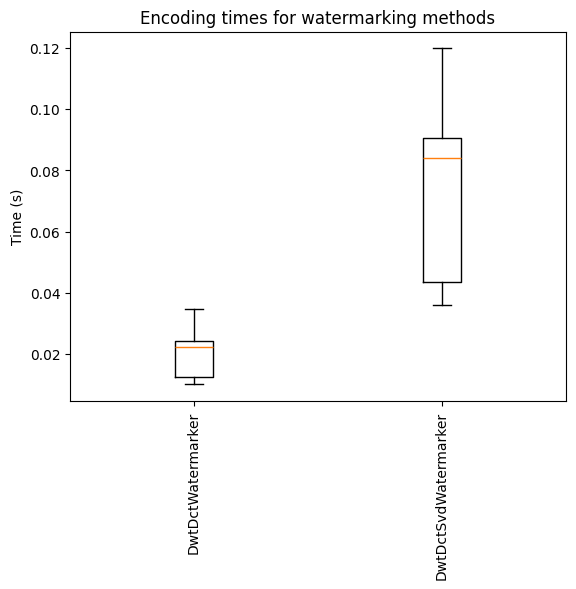

/tmp/ipykernel_56742/631070262.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(decoding_times.values(), labels=decoding_times.keys())


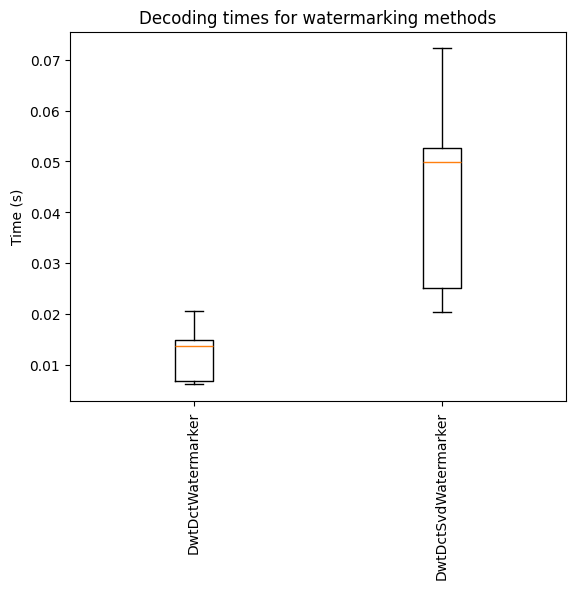

Failed to load BER for 179 attacks


/tmp/ipykernel_56742/631070262.py:109: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ber.values(), labels=ber.keys())


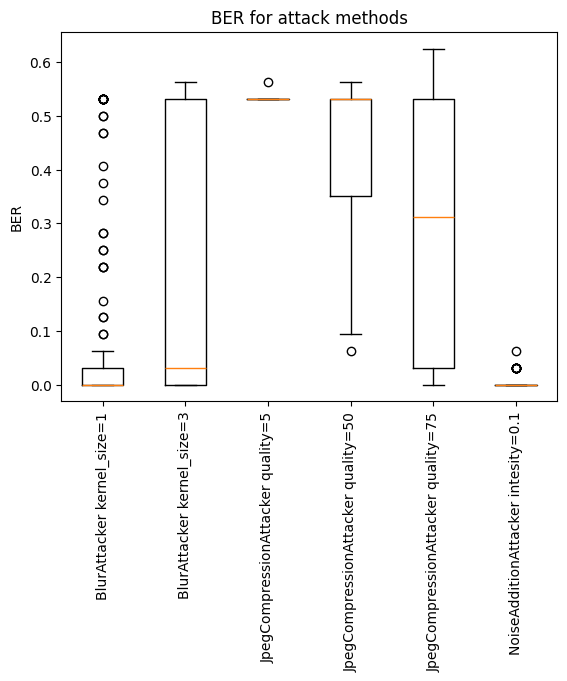

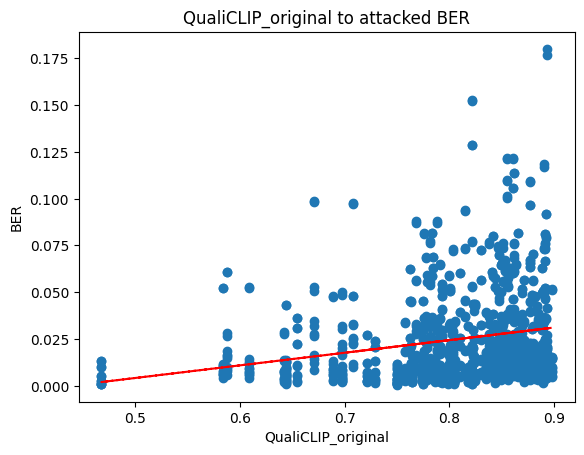

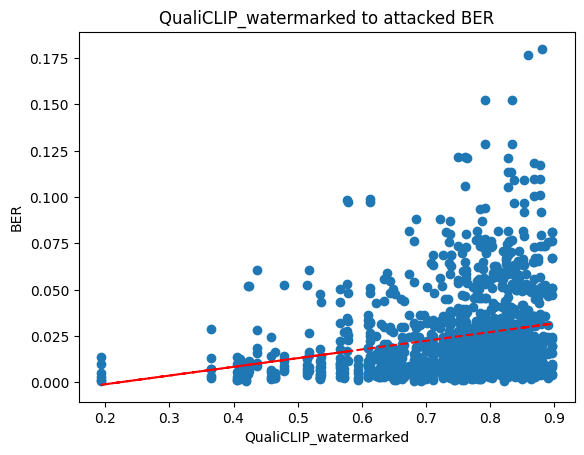

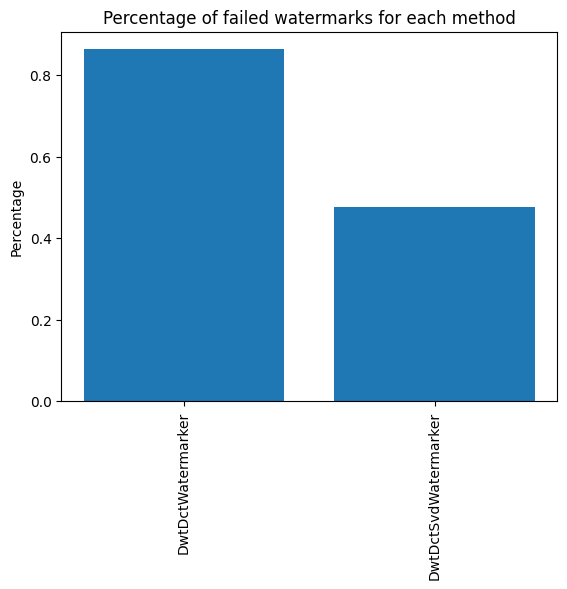

/tmp/ipykernel_56742/631070262.py:200: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ber.values(), labels=ber.keys())


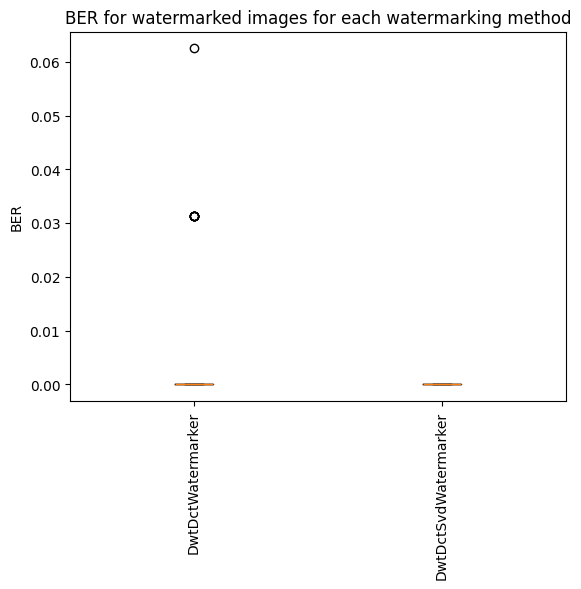

Cannot devide by 0


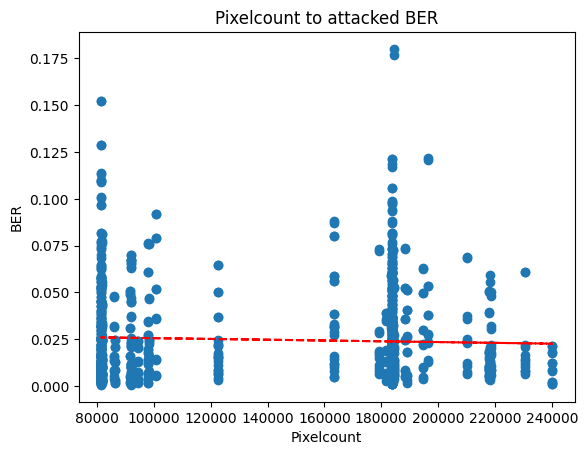

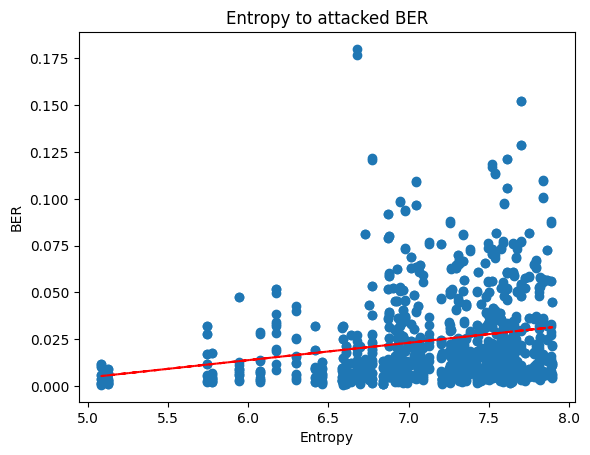

In [3]:
'''
class ImageMetricsModel(BaseModel):
    PSNR: float
    SSIM_RGB: float
    SSIM_Greyscale: float
    Bit_Error_Rate: float
    Mean_Squared_Error: float
    Entropy: float
    Average_Pixel_Error: float
    QualiCLIP_original: float
    QualiCLIP_watermarked: float
    LPIPS_Loss: float | None


class DtoLog(BaseModel):
    filepath: str
    watermarked_analysis_results: ImageMetricsModel
    watermark_method: str
    attack_method: str
    encoding_time: float
    decoding_time: float


class DecodingMetricsModel(BaseModel):
    Correlation_Coefficient: float | None
    Normalized_Correlation_Coefficient: float | None
    Bit_Error_Rate: float
    Mean_Squared_Error: float


class DtoDecode(BaseModel):
    decoded_watermark: str | None  # TODO change to bytes?
    decoding_time: float | None
    decoding_metrics: DecodingMetricsModel | None


class DtoAttack(BaseModel):
    name: str
    attacking_time: float | None
    decoding_results: DtoDecode
    analysis_results: ImageMetricsModel | None


class DtoWatermark(BaseModel):
    name: str
    encoding_time: float
    decoding_results: DtoDecode
    analysis_results: ImageMetricsModel | None
    attacks: list[DtoAttack] = []


class Dto(BaseModel):
    filepath: str
    watermark: str
    watermarks: list[DtoWatermark] = []

'''

# plot encoding times for each watermarking method
import matplotlib.pyplot as plt
import numpy as np

watermarking_methods = set()
encoding_times = {}
for dto in data:
    for watermark in dto.watermarks:
        watermarking_methods.add(watermark.name)
        encoding_times[watermark.name] = encoding_times.get(watermark.name, []) + [watermark.encoding_time]

if len(encoding_times.values()) > 0:
    fig, ax = plt.subplots()
    ax.boxplot(encoding_times.values(), tick_labels=encoding_times.keys())
    ax.set_title("Encoding times for watermarking methods")
    ax.set_ylabel("Time (s)")
    plt.xticks(rotation=90)
    plt.show()

# plot decoding times for each watermarking method
decoding_times = {}
for dto in data:
    for watermark in dto.watermarks:
        decoding_times[watermark.name] = decoding_times.get(watermark.name, []) + [watermark.decoding_results.decoding_time]

if len(decoding_times.values()) > 0:
    fig, ax = plt.subplots()
    ax.boxplot(decoding_times.values(), labels=decoding_times.keys())
    ax.set_title("Decoding times for watermarking methods")
    ax.set_ylabel("Time (s)")
    plt.xticks(rotation=90)
    plt.show()

# plot ber of each attack method
attack_methods = set()
ber = {}
failed = 0
for dto in data:
    for watermark in dto.watermarks:
        for attack in watermark.attacks:
            attack_methods.add(attack.name)
            try:
                ber[attack.name] = ber.get(attack.name, []) + [attack.decoding_results.decoding_metrics.Bit_Error_Rate]
            except:
                failed += 1
                pass
print(f"Failed to load BER for {failed} attacks")

if len(ber.values()) > 0:
    fig, ax = plt.subplots()
    ax.boxplot(ber.values(), labels=ber.keys())
    ax.set_title("BER for attack methods")
    ax.set_ylabel("BER")
    plt.xticks(rotation=90)
    plt.show()

# plot QualiCLIP_original to attacked BER
qualiclip_original = []
ber_attacked = []
for dto in data:
    for watermark in dto.watermarks:
        for attack in watermark.attacks:
            try:
                x = watermark.analysis_results.QualiCLIP_original
                y = attack.analysis_results.Bit_Error_Rate
                qualiclip_original.append(x)
                ber_attacked.append(y)
            except:
                pass

if len(qualiclip_original) > 0:
    fig, ax = plt.subplots()
    ax.scatter(qualiclip_original, ber_attacked)
    ax.set_title("QualiCLIP_original to attacked BER")
    ax.set_xlabel("QualiCLIP_original")
    ax.set_ylabel("BER")
    # add trendline
    z = np.polyfit(qualiclip_original, ber_attacked, 1)
    p = np.poly1d(z)
    plt.plot(qualiclip_original, p(qualiclip_original), "r--")
    plt.show()


# plot QualiCLIP_watermarked to attacked BER
qualiclip_watermarked = []
ber_attacked = []
for dto in data:
    for watermark in dto.watermarks:
        for attack in watermark.attacks:
            try:
                x = watermark.analysis_results.QualiCLIP_watermarked
                y = attack.analysis_results.Bit_Error_Rate
                qualiclip_watermarked.append(x)
                ber_attacked.append(y)
            except:
                pass

if len(qualiclip_watermarked) > 0:
    fig, ax = plt.subplots()
    ax.scatter(qualiclip_watermarked, ber_attacked)
    ax.set_title("QualiCLIP_watermarked to attacked BER")
    ax.set_xlabel("QualiCLIP_watermarked")
    ax.set_ylabel("BER")
    # add trendline
    z = np.polyfit(qualiclip_watermarked, ber_attacked, 1)
    p = np.poly1d(z)
    plt.plot(qualiclip_watermarked, p(qualiclip_watermarked), "r--")
    plt.show()

# draw table of percantage of failed watermarks for each methods (watermark isnt equal to decoded watermark)
# variable data.dto.watermarks.decoding_results.decoded_watermark vs data.dto.watermark
failed_watermarks = {}
total_watermarks = {}
for dto in data:
    for watermark in dto.watermarks:
        for attack in watermark.attacks:
            if dto.watermark != attack.decoding_results.decoded_watermark:
                failed_watermarks[watermark.name] = failed_watermarks.get(watermark.name, 0) + 1
            total_watermarks[watermark.name] = total_watermarks.get(watermark.name, 0) + 1

for key in total_watermarks.keys():
    failed_watermarks[key] = failed_watermarks.get(key, 0) / total_watermarks[key]

fig, ax = plt.subplots()
ax.bar(failed_watermarks.keys(), failed_watermarks.values())
ax.set_title("Percentage of failed watermarks for each method")
ax.set_ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()

# plot watermarked image decoded BER for each watermarking method
ber = {}
for dto in data:
    for watermark in dto.watermarks:
        try:
            ber[watermark.name] = ber.get(watermark.name, []) + [watermark.decoding_results.decoding_metrics.Bit_Error_Rate]
        except:
            pass

if len(ber.values()) > 0:
    fig, ax = plt.subplots()
    ax.boxplot(ber.values(), labels=ber.keys())
    ax.set_title("BER for watermarked images for each watermarking method")
    ax.set_ylabel("BER")
    plt.xticks(rotation=90)
    plt.show()


# plot pixelcount to attacked decoded BER, pixelcounts needs to be calculated from image data get_image_data(filename)
pixelcount = []
ber_attacked = []
failed, total = 0, 0
for dto in data:
    for watermark in dto.watermarks:
        for attack in watermark.attacks:
            total += 1
            try:
                img = cv2.imread(dto.filepath)
                x = img.shape[0] * img.shape[1]
                y = attack.analysis_results.Bit_Error_Rate
                pixelcount.append(x)
                ber_attacked.append(y)
            except:
                failed += 1
                pass
if failed ==0:
    print("Cannot devide by 0")
elif failed/total > 0.1:
    print(f"Failed to load BER for {failed} attacks ({failed/total:.2%})")

if len(pixelcount)>0:
    fig, ax = plt.subplots()
    ax.scatter(pixelcount, ber_attacked)
    ax.set_title("Pixelcount to attacked BER")
    ax.set_xlabel("Pixelcount")
    ax.set_ylabel("BER")
    # add trendline
    z = np.polyfit(pixelcount, ber_attacked, 1)
    p = np.poly1d(z)
    plt.plot(pixelcount, p(pixelcount), "r--")
    plt.show()

# plot image entropy to attacked decoded BER
entropy = []
ber_attacked = []
failed, total = 0, 0
for dto in data:
    for watermark in dto.watermarks:
        for attack in watermark.attacks:
            total += 1
            try:
                img = cv2.imread(dto.filepath)
                x = cv2.calcHist([img], [0], None, [256], [0, 256])
                x = -np.sum(x[x > 0] / np.sum(x) * np.log2(x[x > 0] / np.sum(x)))
                y = attack.analysis_results.Bit_Error_Rate
                entropy.append(x)
                ber_attacked.append(y)
            except:
                failed += 1
                pass
    
if total == 0:
    print("Cannot devide by 0")
elif failed/total > 0.1:
    print(f"Failed to load BER for {failed} attacks ({failed/total:.2%})")

if len(entropy)>0:
    fig, ax = plt.subplots()
    ax.scatter(entropy, ber_attacked)
    ax.set_title("Entropy to attacked BER")
    ax.set_xlabel("Entropy")
    ax.set_ylabel("BER")
    # add trendline
    z = np.polyfit(entropy, ber_attacked, 1)
    p = np.poly1d(z)
    plt.plot(entropy, p(entropy), "r--")
    plt.show()








/tmp/ipykernel_56742/4235191321.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(psnr.values(), labels=psnr.keys())


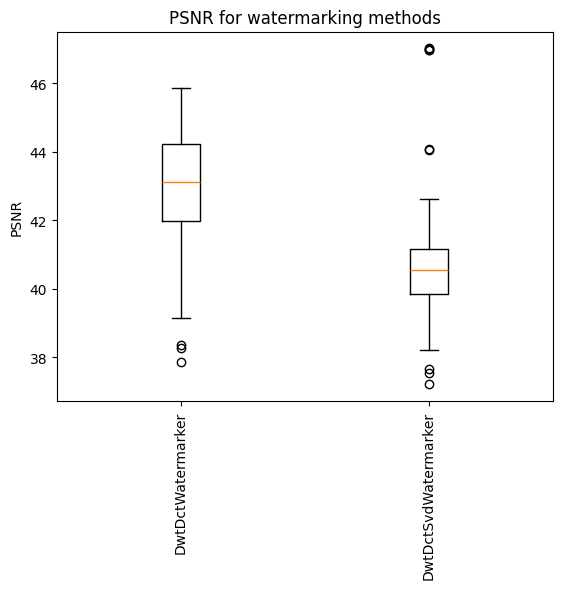

In [4]:
# plot watermark method to PSNR
psnr = {}
total = 0
for dto in data:
    for watermark in dto.watermarks:
        psnr[watermark.name] = psnr.get(watermark.name, []) + [watermark.analysis_results.PSNR]
        total += 1

if len(psnr.values()) > 0:
    fig, ax = plt.subplots()
    ax.boxplot(psnr.values(), labels=psnr.keys())
    ax.set_title(f"PSNR for watermarking methods")
    ax.set_ylabel("PSNR")
    plt.xticks(rotation=90)
    plt.show()

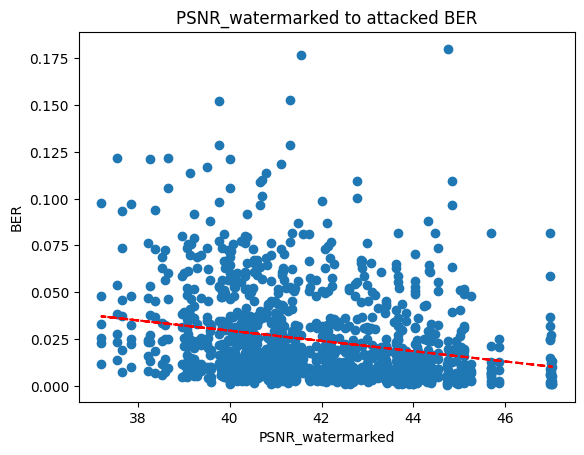

In [5]:
# watermarked PSNR to attacked BER
psnr_watermarked = []
ber_attacked = []
failed, total = 0, 0
for dto in data:
    for watermark in dto.watermarks:
        for attack in watermark.attacks:
            total += 1
            try:
                x = watermark.analysis_results.PSNR
                y = attack.analysis_results.Bit_Error_Rate
                psnr_watermarked.append(x)
                ber_attacked.append(y)
            except:
                failed += 1
                pass
if total == 0:
    print("Cannot devide by 0")
elif failed/total > 0.1:
    print(f"Failed to load BER for {failed} attacks ({failed/total:.2%})")

fig, ax = plt.subplots()
ax.scatter(psnr_watermarked, ber_attacked)
ax.set_title("PSNR_watermarked to attacked BER")
ax.set_xlabel("PSNR_watermarked")
ax.set_ylabel("BER")
# add trendline
z = np.polyfit(psnr_watermarked, ber_attacked, 1)
p = np.poly1d(z)
plt.plot(psnr_watermarked, p(psnr_watermarked), "r--")
plt.show()


/tmp/ipykernel_56742/121433777.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ssim.values(), labels=ssim.keys())


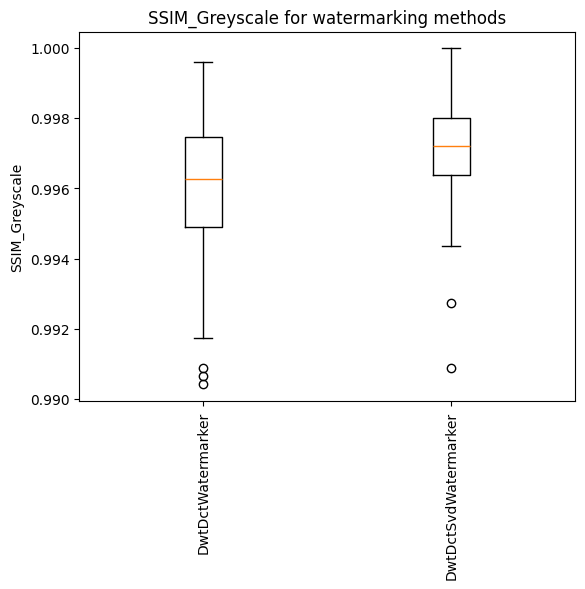

In [6]:
# plot watermark method to SSIM_Greyscale
ssim = {}
total = 0
for dto in data:
    for watermark in dto.watermarks:
        ssim[watermark.name] = ssim.get(watermark.name, []) + [watermark.analysis_results.SSIM_Greyscale]
        total += 1

fig, ax = plt.subplots()
ax.boxplot(ssim.values(), labels=ssim.keys())
ax.set_title(f"SSIM_Greyscale for watermarking methods")
ax.set_ylabel("SSIM_Greyscale")
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_56742/983625076.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ssim.values(), labels=ssim.keys())


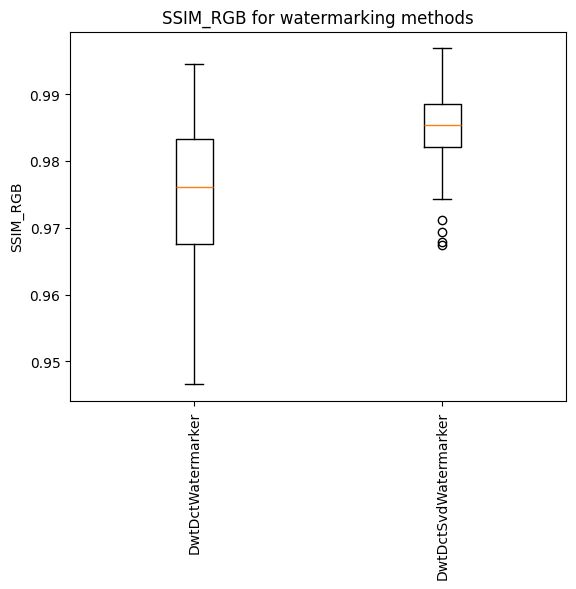

In [7]:
# plot watermark method to SSIM_RGB
ssim = {}
total = 0
for dto in data:
    for watermark in dto.watermarks:
        ssim[watermark.name] = ssim.get(watermark.name, []) + [watermark.analysis_results.SSIM_RGB]
        total += 1

fig, ax = plt.subplots()
ax.boxplot(ssim.values(), labels=ssim.keys())
ax.set_title(f"SSIM_RGB for watermarking methods")
ax.set_ylabel("SSIM_RGB")
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_56742/620967852.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(mse.values(), labels=mse.keys())


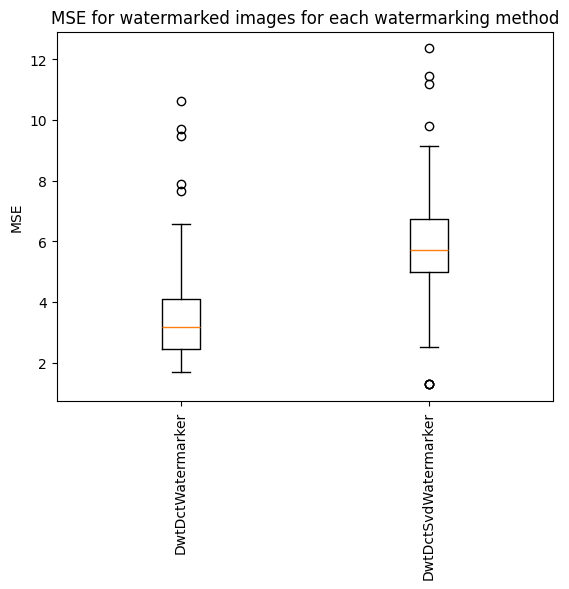

In [8]:
mse = {}
total = 0
for dto in data:
    for watermark in dto.watermarks:
        mse[watermark.name] = mse.get(watermark.name, []) + [watermark.analysis_results.Mean_Squared_Error]
        total += 1

fig, ax = plt.subplots()
ax.boxplot(mse.values(), labels=mse.keys())
ax.set_title(f"MSE for watermarked images for each watermarking method")
ax.set_ylabel("MSE")
plt.xticks(rotation=90)
plt.show()


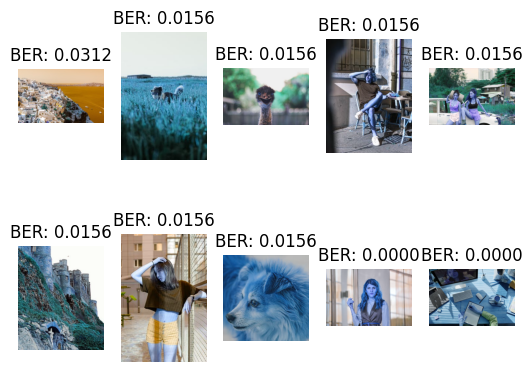

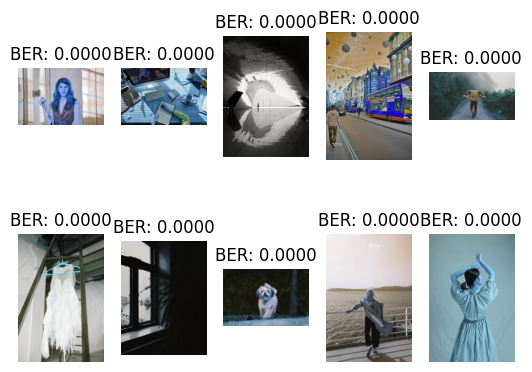

In [9]:
# sort images by highest to lowest averaged! watermarked encoded BER
images = {} # key: image path, value: list of BERs
for dto in data:
    ber = []
    for watermark in dto.watermarks:
        try:
            ber.append(watermark.decoding_results.decoding_metrics.Bit_Error_Rate)
        except:
            pass
    if ber:
        images[dto.filepath] = np.mean(ber)

sorted_images = {k: v for k, v in sorted(images.items(), key=lambda item: item[1], reverse=True)}
# draw images on plot, top 10
fig, ax = plt.subplots(2, 5)
for i, (k, v) in enumerate(sorted_images.items()):
    img = cv2.imread(k)
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(f"BER: {v:.4f}")
    ax[i//5, i%5].axis("off")
    if i == 9:
        break
plt.show()

# take bottom 10 images
sorted_images = {k: v for k, v in sorted(images.items(), key=lambda item: item[1])}
# draw images on plot, bottom 10
fig, ax = plt.subplots(2, 5)
for i, (k, v) in enumerate(sorted_images.items()):
    img = cv2.imread(k)
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(f"BER: {v:.4f}")
    ax[i//5, i%5].axis("off")
    if i == 9:
        break
plt.show()

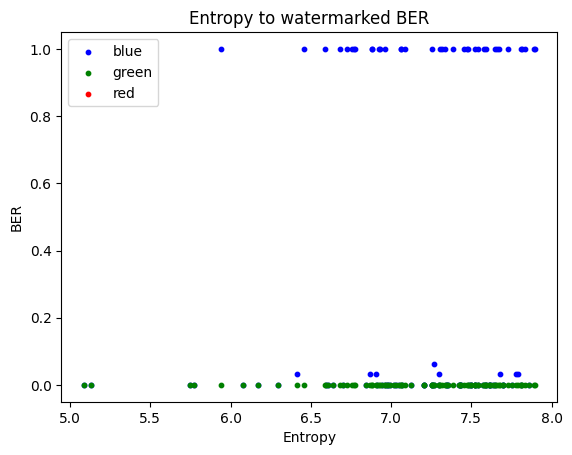

In [10]:
# plot image entropy to watermarked decoded BER, NOT ATTACKED
colors = {
    'DwtDctWatermarker': 'blue',
    'DwtDctSvdWatermarker': 'green',
    'RivaGanWatermarker': 'red'
}

entropy = []
ber = []
color_list = []
failed, total = 0, 0
for dto in data:
    for watermark in dto.watermarks:
        total += 1
        try:
            img = cv2.imread(dto.filepath)
            x = cv2.calcHist([img], [0], None, [256], [0, 256])
            x = -np.sum(x[x > 0] / np.sum(x) * np.log2(x[x > 0] / np.sum(x)))
            y = -1
            if watermark.decoding_results.decoding_metrics is None or watermark.decoding_results.decoding_metrics.Bit_Error_Rate is None:
                y = 1
            else:
                y = watermark.decoding_results.decoding_metrics.Bit_Error_Rate
            entropy.append(x)
            ber.append(y)
            color_list.append(colors[watermark.name])
        except:
            failed += 1
            pass
if failed/total > 0.1:
    print(f"Failed to load BER for {failed} attacks ({failed/total:.2%})")

fig, ax = plt.subplots()
for color in colors.values():
    indices = [i for i, c in enumerate(color_list) if c == color]
    ax.scatter([entropy[i] for i in indices], [ber[i] for i in indices], c=color, label=color, s=10)  # Set point size to 10

ax.set_title("Entropy to watermarked BER")
ax.set_xlabel("Entropy")
ax.set_ylabel("BER")
ax.legend()
# add trendline for each color
if len(indices) > 0:
    for color in colors.values():
        indices = [i for i, c in enumerate(color_list) if c == color]
        z = np.polyfit([entropy[i] for i in indices], [ber[i] for i in indices], 1)
        p = np.poly1d(z)
        plt.plot([entropy[i] for i in indices], p([entropy[i] for i in indices]), "--", c=color)
    plt.show()


In [11]:
def extract_metrics(dtos:list[Dto]) -> pd.DataFrame:
    return pd.DataFrame([
        {
            # Used only for grouping - not to show because is not numeric
            "Watermark_Algorithm": watermark.name,
            "Attack_Name": attack.name,

            # ImageMetricsModel metrics
            "PSNR": watermark.analysis_results.PSNR,
            "SSIM_RGB": watermark.analysis_results.SSIM_RGB,
            "SSIM_Greyscale": watermark.analysis_results.SSIM_Greyscale,
            "Bit_Error_Rate_IMG": watermark.analysis_results.Bit_Error_Rate,
            "Mean_Squared_Error_IMG": watermark.analysis_results.Mean_Squared_Error,
            "Entropy": watermark.analysis_results.Entropy,
            "Average_Pixel_Error": watermark.analysis_results.Average_Pixel_Error,
            "QualiCLIP_original": watermark.analysis_results.QualiCLIP_original,
            "QualiCLIP_watermarked": watermark.analysis_results.QualiCLIP_watermarked,
            "LPIPS_Loss": watermark.analysis_results.LPIPS_Loss,

            # DecodingMetricsModel metrics
            "DECODE_Correlation_Coefficient": getattr(
                getattr(attack.decoding_results.decoding_metrics, "Correlation_Coefficient", None),
                "Correlation_Coefficient", None
            ),
            "DECODE_Normalized_Correlation_Coefficient": getattr(
                attack.decoding_results.decoding_metrics, "Normalized_Correlation_Coefficient", None
            ),
            "DECODE_Bit_Error_Rate_DEC": getattr(attack.decoding_results.decoding_metrics, "Bit_Error_Rate", None),
            "DECODE_Mean_Squared_Error_DEC": getattr(attack.decoding_results.decoding_metrics, "Mean_Squared_Error", None),

            # Time
            "Encoding_Time":watermark.encoding_time,
            "Decoding_Time":watermark.decoding_results.decoding_time,
        }
        for dto in dtos
        for watermark in dto.watermarks
        for attack in watermark.attacks
    ])

def plot_algorithm_metrics(df:pd.DataFrame, metric:str)->None:
    assert metric in df.columns, f"Metric '{metric}' not found in DataFrame. Available columns: {list(df.columns)}"

    for algo, group in df.groupby("Watermark_Algorithm"):
        plt.figure(figsize=(10, 6))
        bars = plt.bar(group["Attack_Name"], group[metric], color="skyblue")
        plt.title(f"{metric} for Algorithm: {algo}")
        plt.ylabel(metric)
        plt.xlabel("Attack Name")
        plt.xticks(rotation=45, ha="right")

        for bar in bars:
            yval = bar.get_height()
            if np.isfinite(yval):
                plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha="center", va="bottom")

        plt.tight_layout()
        plt.show()

def plot_correlation_heatmaps(df: pd.DataFrame)->None:
    # Iterate through unique Watermark_Algorithm values
    for algorithm in df["Watermark_Algorithm"].unique():
        # Filter the data for the current algorithm
        algorithm_df = df[df["Watermark_Algorithm"] == algorithm]
        # Select only numeric columns for correlation calculation
        numeric_cols = algorithm_df.select_dtypes(include="number")
        # Compute the correlation matrix
        correlation_matrix = numeric_cols.corr()
        # Plot the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title(f"Correlation Heatmap for {algorithm}")
        plt.tight_layout()
        plt.show()

df_metrics = extract_metrics(data)
corr_matrix = df_metrics.select_dtypes(include=["number"]).corr()

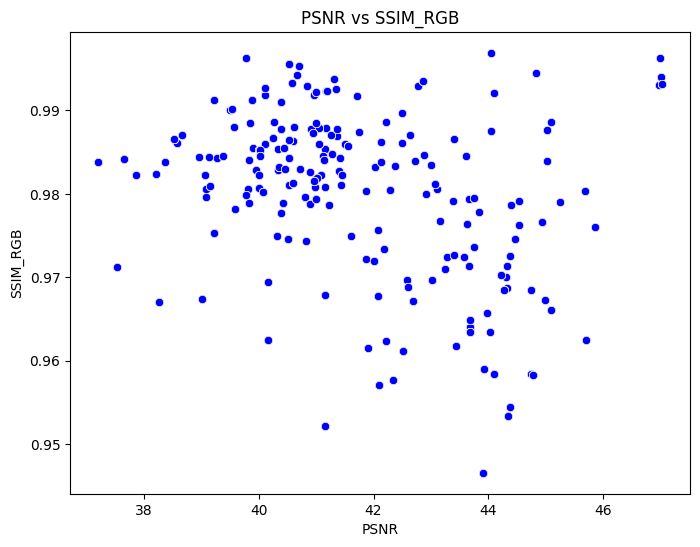

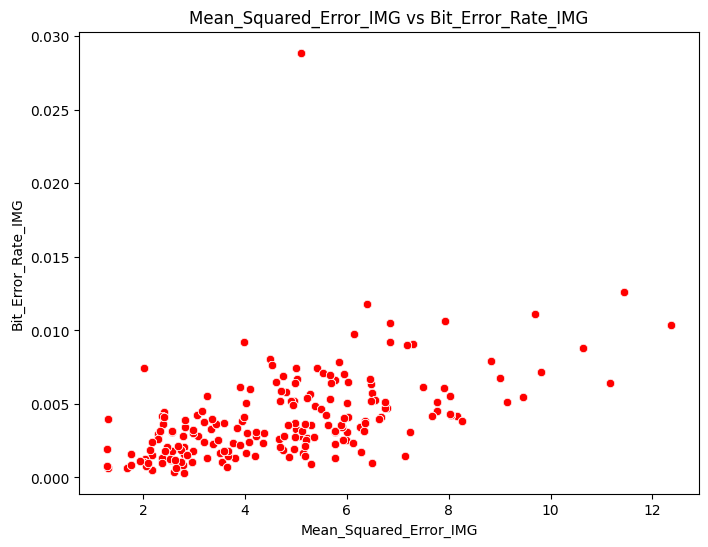

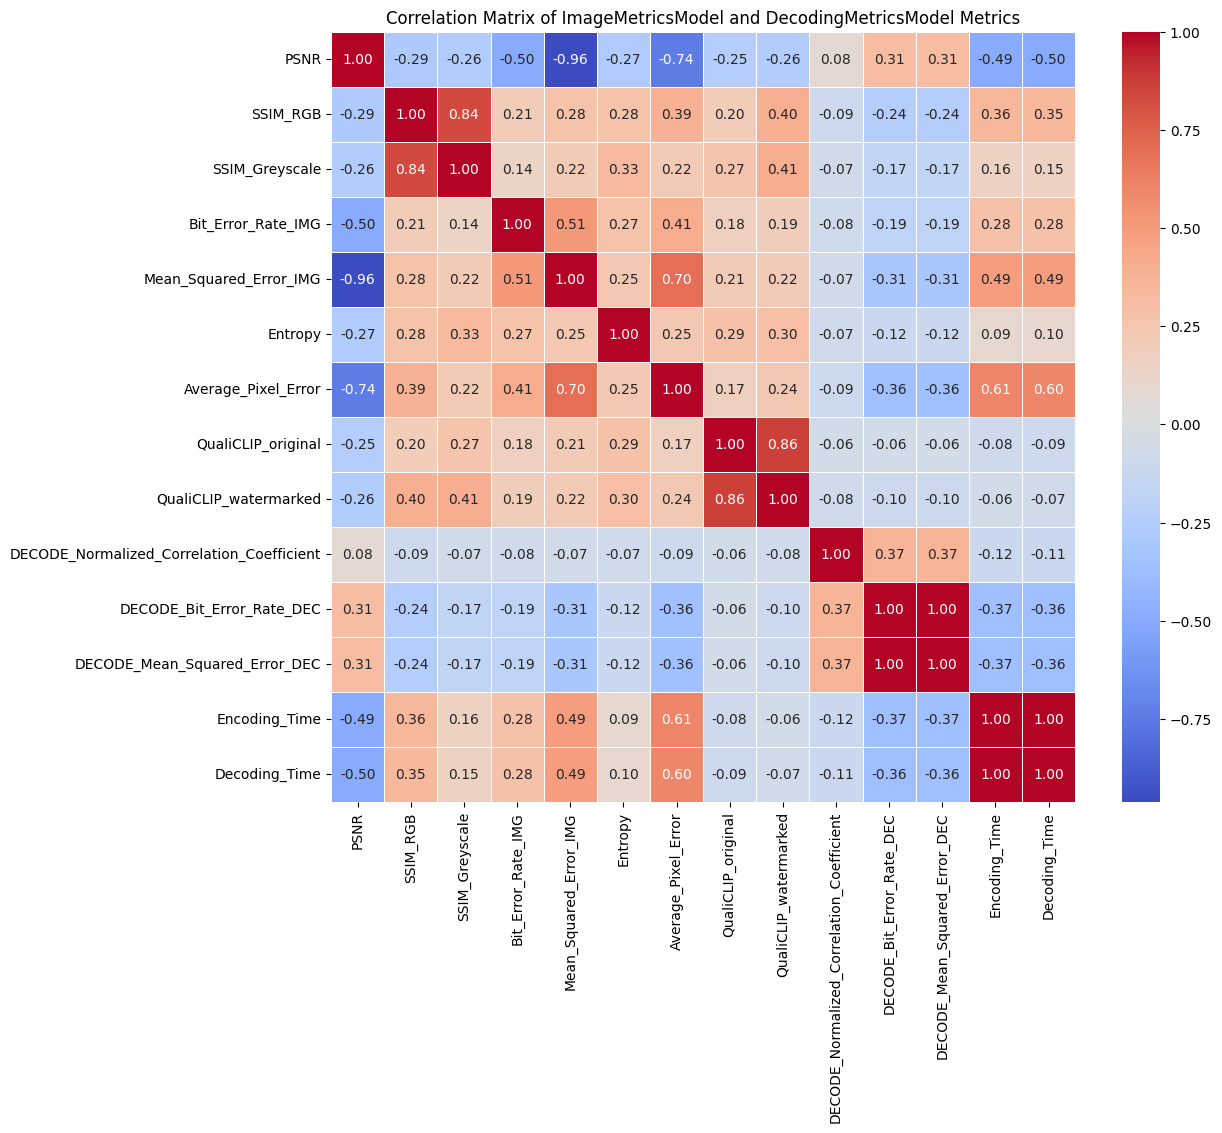

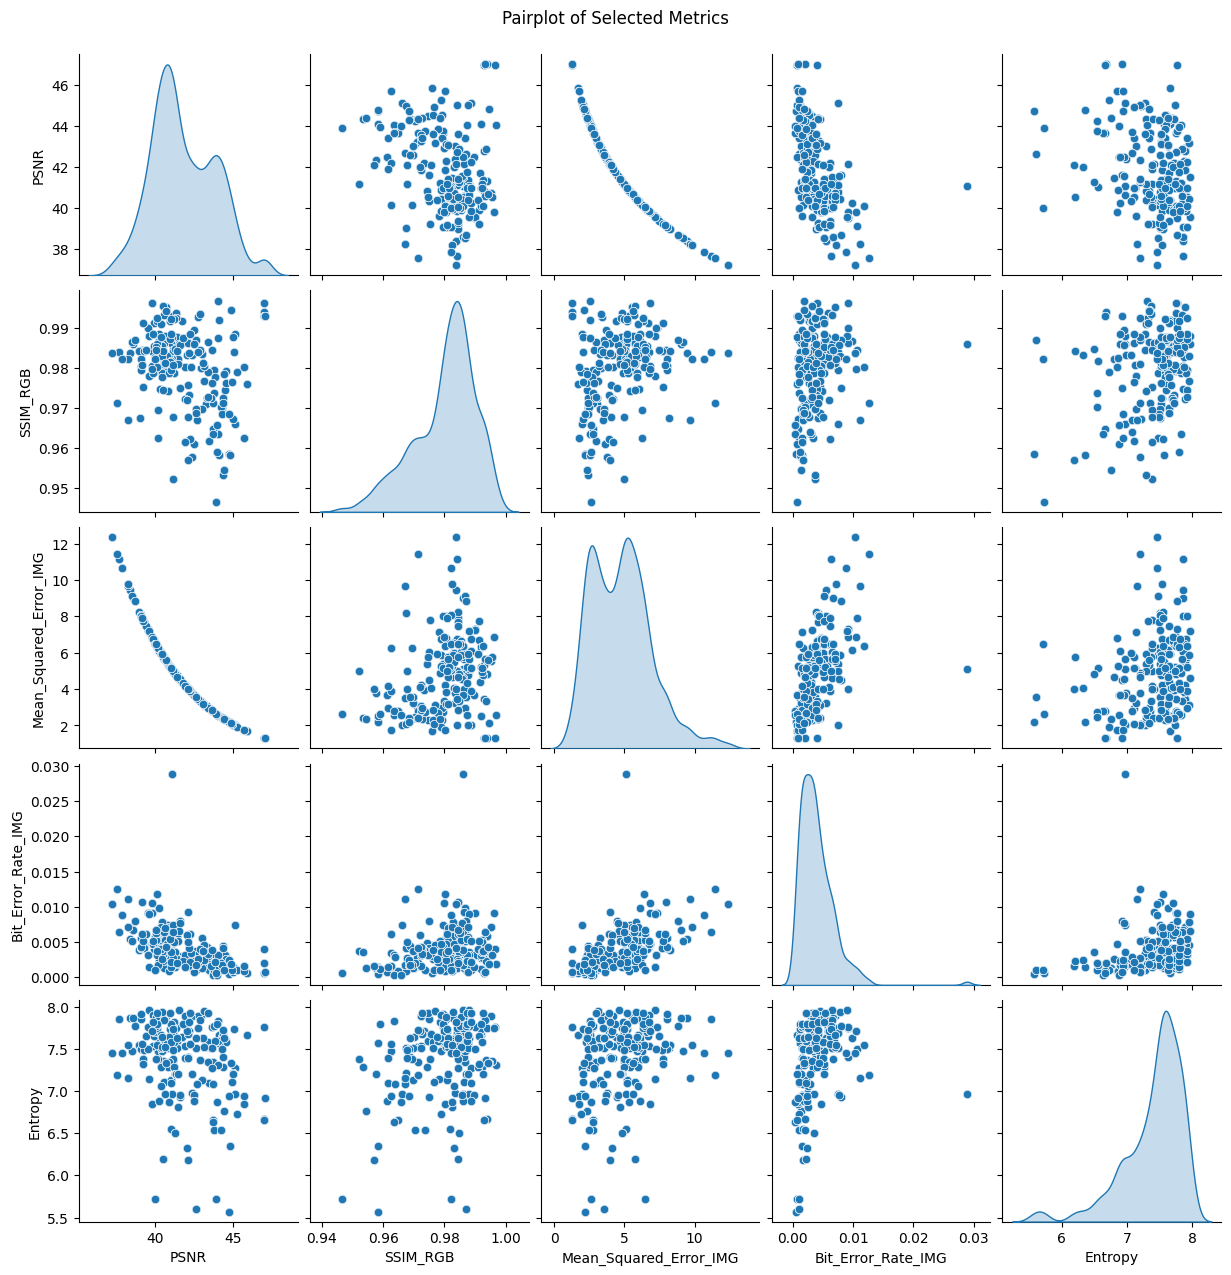

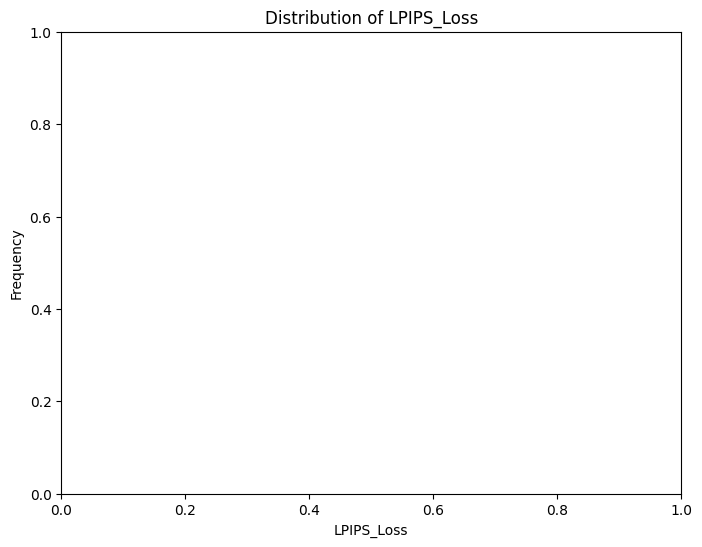

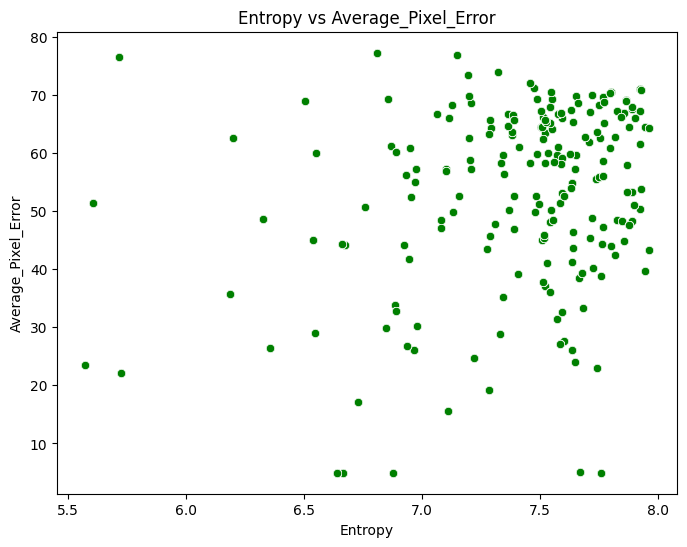

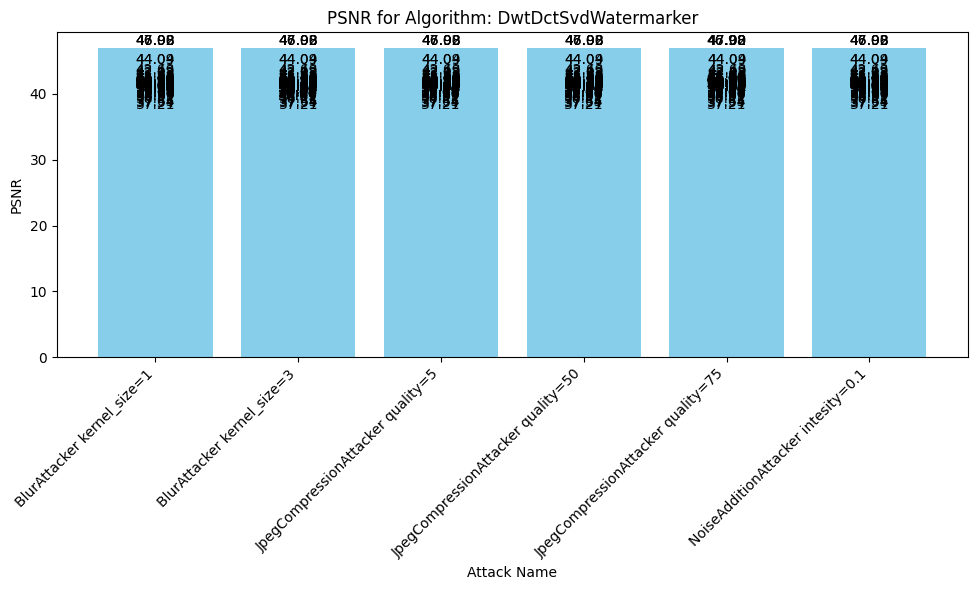

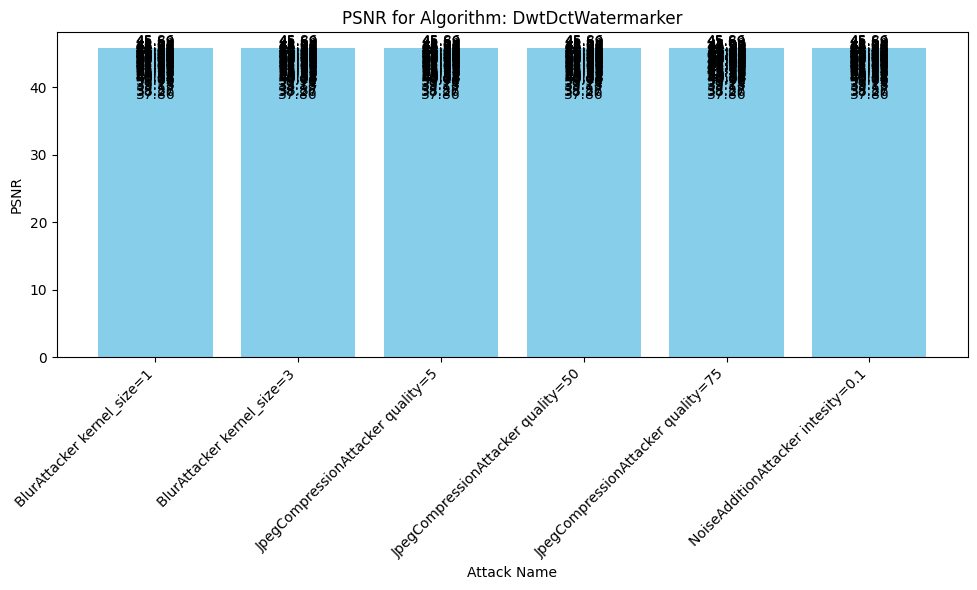

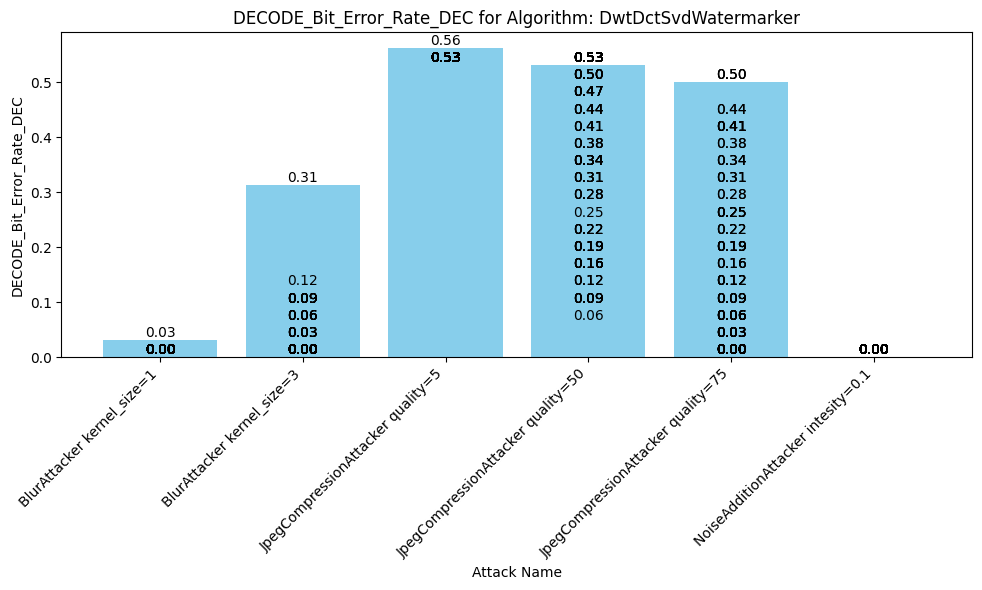

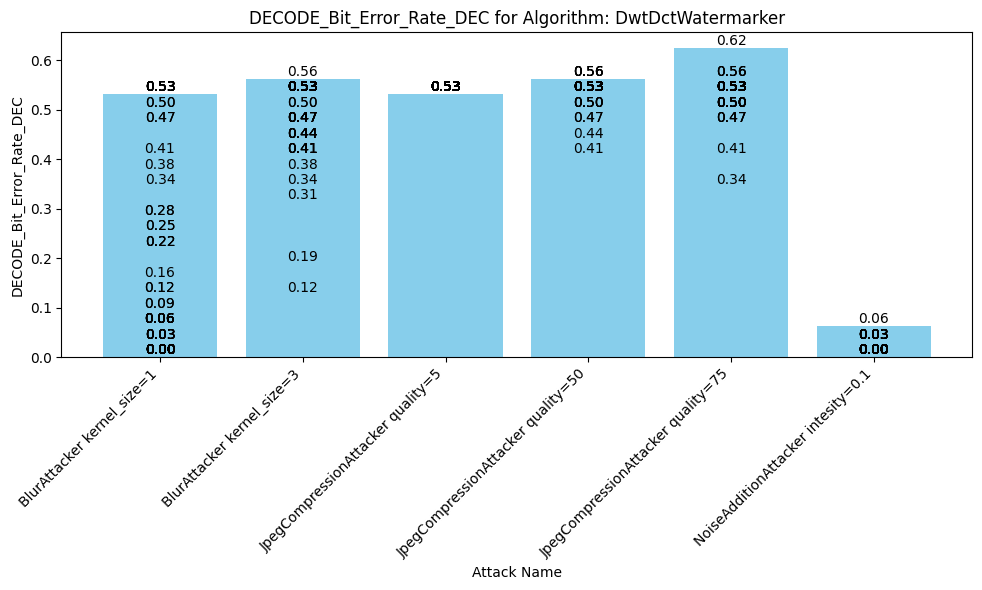

In [12]:

# Scatter plot to visualize relationship between PSNR and SSIM_RGB
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_metrics, x="PSNR", y="SSIM_RGB", color="blue")
plt.title("PSNR vs SSIM_RGB")
plt.xlabel("PSNR")
plt.ylabel("SSIM_RGB")
plt.show()

# Scatter plot between Mean_Squared_Error_IMG and Bit_Error_Rate_IMG
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_metrics, x="Mean_Squared_Error_IMG", y="Bit_Error_Rate_IMG", color="red")
plt.title("Mean_Squared_Error_IMG vs Bit_Error_Rate_IMG")
plt.xlabel("Mean_Squared_Error_IMG")
plt.ylabel("Bit_Error_Rate_IMG")
plt.show()

# Correlation matrix heatmap for all selected metrics
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of ImageMetricsModel and DecodingMetricsModel Metrics")
plt.show()

# Pairplot to explore relationships between multiple metrics at once
metrics_to_plot = ["PSNR", "SSIM_RGB", "Mean_Squared_Error_IMG", "Bit_Error_Rate_IMG", "Entropy"]
sns.pairplot(df_metrics[metrics_to_plot], diag_kind="kde", plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot of Selected Metrics", y=1.02)
plt.show()

# Histogram of LPIPS_Loss values
plt.figure(figsize=(8, 6))
sns.histplot(df_metrics["LPIPS_Loss"].dropna(), kde=True, color="purple")
plt.title("Distribution of LPIPS_Loss")
plt.xlabel("LPIPS_Loss")
plt.ylabel("Frequency")
plt.show()

# Scatter plot between Entropy and Average_Pixel_Error
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_metrics, x="Entropy", y="Average_Pixel_Error", color="green")
plt.title("Entropy vs Average_Pixel_Error")
plt.xlabel("Entropy")
plt.ylabel("Average_Pixel_Error")
plt.show()

# Add whatever metric you want
plot_algorithm_metrics(df_metrics, metric="PSNR")
plot_algorithm_metrics(df_metrics, metric="DECODE_Bit_Error_Rate_DEC")

In [ ]:
plot_correlation_heatmaps(df_metrics)